# **VARIOUS METHODS OF IMPLEMENTING SIMPLE LINEAR REGRESSION**

# **Setting up the environment**

In [1]:
import numpy as np


In [2]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m,1)

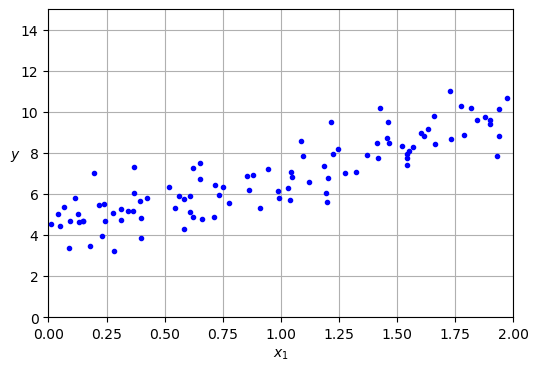

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [4]:
X.shape

(100, 1)

In [5]:
y.shape

(100, 1)

# **1.From Scratch**

In [6]:
mean_x = np.mean(X)
mean_y = np.mean(y)
 
n = len(X)

numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)

print(c, m)

[4.21509616] [2.77011339]


# **2.Using Normal equation**

In [7]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)


In [8]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

# **3.Using Scikit-Learn**

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

# **4.Least Squares Estimator**

In [10]:
theta_best , residuals ,rank , s = np.linalg.lstsq(X_b , y , rcond=1e-6)
theta_best

array([[4.21509616],
       [2.77011339]])

# **5.Moore-Penrose inverse**

In [11]:
theta_best = np.linalg.pinv(X_b)@y
theta_best

array([[4.21509616],
       [2.77011339]])

# **6.OLS using statsmodels.api**

In [12]:
import statsmodels.api as sm
X_b = sm.add_constant(X)
lm = sm.OLS(y,X_b).fit()
lm.params

array([4.21509616, 2.77011339])

In [13]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.767   
Dependent Variable: y                AIC:                266.2931
Date:               2023-04-15 15:01 BIC:                271.5034
No. Observations:   100              Log-Likelihood:     -131.15 
Df Model:           1                F-statistic:        326.7   
Df Residuals:       98               Prob (F-statistic): 5.66e-33
R-squared:          0.769            Scale:              0.82305 
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    4.2151      0.1703    24.7530    0.0000    3.8772    4.5530
x1       2.7701      0.1532    18.0761    0.0000    2.4660    3.0742
-----------------------------------------------------------------
Omnibus:              0.900        Durbin-Watson:           2.285
Prob(Omnibus):        0.638        Jarque-Bera (JB):        0.808
Skew:                 0.217        Prob(JB):                0.668
Kurtosis:             2.929        Condition No.:           3    
=================================================================

"""